In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("heart.csv")
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
data.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


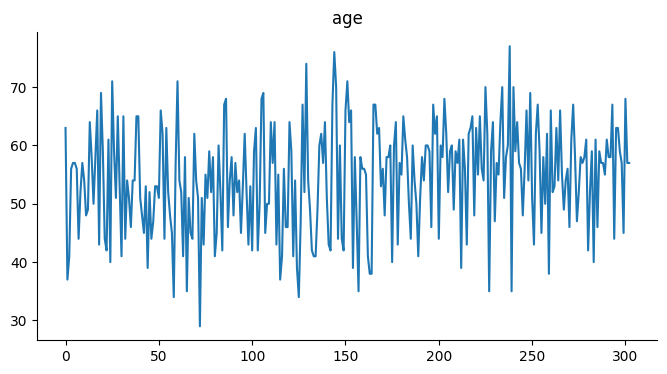

In [ ]:
data['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data_name = data.loc[data['age'].idxmax()]
data_name #El sujeto mas mayor

age          77.0
sex           1.0
cp            0.0
trestbps    125.0
chol        304.0
fbs           0.0
restecg       0.0
thalach     162.0
exang         1.0
oldpeak       0.0
slope         2.0
ca            3.0
thal          2.0
target        0.0
Name: 238, dtype: float64

In [ ]:
print("There's more defective hearts than healthy in this dataset: ")
print("")
data['target'].value_counts()
# 1 = Defective Heart
# 0 = Healthy Hear

There's more defective hearts than healthy in this dataset: 



target
1    165
0    138
Name: count, dtype: int64

In [ ]:
#Librarys to create the model of prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
x = data.drop(columns = 'target', axis=1)
y = data['target']

In [ ]:
# As you can see it does not have the target column.
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
#We have target in here.
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [ ]:
#Let us divide the train data(x) from the test data(y)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2,stratify=y)
print(y_test.shape)
print(x_test.shape)

(61,)
(61, 13)


In [ ]:
#Create the model or the "canvas"
model = LogisticRegression()
#"Pass the train data to that "canvas"
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
x_train_prediction = model.predict(x_train)
trainDataAcc = accuracy_score(x_train_prediction,y_train)
trainDataAcc

0.8512396694214877

In [ ]:
x_test_prediction = model.predict(x_test)
testDataAcc = accuracy_score(x_test_prediction,y_test)
testDataAcc

0.819672131147541

In [ ]:
#To learn: Desicion tree / Ramdom forest / SVC

In [ ]:
#Let's create the predictive model
input = (63,1,3,145,233,1,0,150,0,2.3,0,0,1)
dataArray = np.asanyarray(input)
res = dataArray.reshape(1,-1)
prediction = model.predict(res)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
#Test
prediction[0]

1

In [ ]:
"""def inputIn():
  print("Give me the values in order: ")

  # Collect user inputs
  dataInput1 = int(input("age: "))
  dataInput2 = int(input("sex: "))
  dataInput3 = int(input("cp: "))
  dataInput4 = int(input("trestbps: "))
  dataInput5 = int(input("chol: "))
  dataInput6 = int(input("fbs: "))
  dataInput7 = int(input("restecg: "))
  dataInput8 = int(input("thalach: "))
  dataInput9 = int(input("exang: "))
  dataInput10 = float(input("oldpeak: "))
  dataInput11 = int(input("slope: "))
  dataInput12 = int(input("ca: "))
  dataInput13 = int(input("thal: "))
  # Collect all inputs into a list
  newArray = [
      dataInput1, dataInput2, dataInput3, dataInput4, dataInput5,
      dataInput6, dataInput7, dataInput8, dataInput9, dataInput10,
      dataInput11, dataInput12, dataInput13
  ]

inputIn()"""

'def inputIn(): \n  print("Give me the values in order: ")\n\n  # Collect user inputs\n  dataInput1 = int(input("age: "))\n  dataInput2 = int(input("sex: "))\n  dataInput3 = int(input("cp: "))\n  dataInput4 = int(input("trestbps: "))\n  dataInput5 = int(input("chol: "))\n  dataInput6 = int(input("fbs: "))\n  dataInput7 = int(input("restecg: "))\n  dataInput8 = int(input("thalach: "))\n  dataInput9 = int(input("exang: "))\n  dataInput10 = float(input("oldpeak: "))\n  dataInput11 = int(input("slope: "))\n  dataInput12 = int(input("ca: "))\n  dataInput13 = int(input("thal: "))\n  # Collect all inputs into a list\n  newArray = [\n      dataInput1, dataInput2, dataInput3, dataInput4, dataInput5, \n      dataInput6, dataInput7, dataInput8, dataInput9, dataInput10, \n      dataInput11, dataInput12, dataInput13\n  ]\n\ninputIn()'